In [1]:
%pip install sentence_transformers

Note: you may need to restart the kernel to use updated packages.


# 2nd model(model with less layers) giving better result

In [8]:
# from sentence_transformers import SentenceTransformer, util

# model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')  # multi-language model

# sentences = [
#     'median age of female population',
#     'age'
# ]

In [9]:
embedding = model.encode(sentences, convert_to_tensor=False)
# embedding[0]

In [10]:
embedding.shape

(2, 384)

In [11]:
cosine_scores = util.cos_sim(embedding, embedding)

d = {}
for i, v1 in enumerate(sentences):
    for j, v2 in enumerate(sentences):
        if i >= j:
            continue
        d[v1 + ' vs. ' + v2] = cosine_scores[i][j].item()

# sort by score
d_sorted = dict(sorted(d.items(), key=lambda x: x[1], reverse=True))
d_sorted

{'median age of female population vs. age': 0.5965039730072021}

#Model 2

In [24]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # multi-language model

sentences = [
    'latino',
    'he is latino man',
]

In [36]:
sentences = [
    'latino',
    'this is latino man and women',
]

In [37]:
embedding = model.encode(sentences, convert_to_tensor=False)
embedding.shape

(2, 384)

In [38]:
import numpy
euclidean_dist_easy = numpy.linalg.norm(embedding[0] - embedding[1])
euclidean_dist_easy

6.442112

In [19]:
cosine_scores = util.cos_sim(embedding, embedding)

d = {}
for i, v1 in enumerate(sentences):
    for j, v2 in enumerate(sentences):
        if i >= j:
            continue
        d[v1 + ' vs. ' + v2] = cosine_scores[i][j].item()

# sort by score
d_sorted = dict(sorted(d.items(), key=lambda x: x[1], reverse=True))
d_sorted

{'latino vs. he is not latino man': 0.6431795954704285}

In [20]:
%pip install gensim


   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB 2.0 MB/s eta 0:00:12
   ---------------------------------------- 0.1/24.0 MB 1.4 MB/s eta 0:00:17
   ---------------------------------------- 0.2/24.0 MB 1.7 MB/s eta 0:00:14
    --------------------------------------- 0.3/24.0 MB 2.0 MB/s eta 0:00:13
    --------------------------------------- 0.5/24.0 MB 2.6 MB/s eta 0:00:09
   - -------------------------------------- 0.8/24.0 MB 3.2 MB/s eta 0:00:08
   -- ------------------------------------- 1.3/24.0 MB 4.5 MB/s eta 0:00:06
   -- ------------------------------------- 1.7/24.0 MB 5.2 MB/s eta 0:00:05
   --- ------------------------------------ 2.1/24.0 MB 5.7 MB/s eta 0:00:04
   --- ------------------------------------ 2.1/24.0 MB 5.7 MB/s eta 0:00:04
   --- ------------------------------------ 2.1/24.0 MB 5.7 MB/s eta 0:00:04
   --- ------------------------------------ 2.1/24.0 MB 5.7 MB/s eta 0:00:04
   --

In [21]:
sentences_a="latino"
sentences_b="he is not latino man"
sentences_a=sentences_a.lower().split()
sentences_b=sentences_b.lower().split()
from nltk.corpus import stopwords
from nltk import download
download('stopwords')  # Download stopwords list.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
# remove stopwords
stop_words = stopwords.words('english')
sentences_a = [word for word in sentences_a if word not in stop_words]
sentences_b = [word for word in sentences_b if word not in stop_words]
import gensim.downloader as api
model=api.load('word2vec-google-news-300')
distance=model.wmdistance(sentences_a,sentences_b)
print('distance = %.4f' % distance)

[====----------------------------------------------] 9.0% 150.4/1662.8MB downloaded

KeyboardInterrupt: 

In [5]:
# loading the dataset onlyvariable.csv
import pandas as pd
import numpy as np 

df=pd.read_csv('E:/gc_data/dataset/onlyvariabe.csv')
df.head(5)

,Domain,Topic,Data Source,Variable Name,Variable Label
0,1. Social context,Demographics,ACS,ACS_AVG_HH_SIZE,Average household size
1,2. Economic context,Income,ACS,ACS_GINI_INDEX,Gini index of income inequality
2,2. Economic context,Income,ACS,ACS_MDN_GRNDPRNT_INC,Median income of grandparent householder and/o...
3,2. Economic context,Income,ACS,ACS_MDN_GRNDPRNT_NO_PRNT_INC,Median income of grandparent householder and/o...
4,4. Physical infrastructure,Housing,ACS,ACS_MDN_OWNER_COST_MORTGAGE,Median selected monthly owner costs for houses...


In [6]:
# adding 7 new columns to the dataframe to store the similarity scores again some 8 words
df['Age'] = np.nan
df['Address'] = np.nan
df['Zip Code'] = np.nan
df['Gender'] = np.nan
df['Race'] = np.nan
df['Income'] = np.nan
df['Education'] = np.nan
df['Veteran Status'] = np.nan
df.head(5)

,Domain,Topic,Data Source,Variable Name,Variable Label,Age,Address,Zip Code,Gender,Race,Income,Education,Veteran Status
0,1. Social context,Demographics,ACS,ACS_AVG_HH_SIZE,Average household size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2. Economic context,Income,ACS,ACS_GINI_INDEX,Gini index of income inequality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2. Economic context,Income,ACS,ACS_MDN_GRNDPRNT_INC,Median income of grandparent householder and/o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2. Economic context,Income,ACS,ACS_MDN_GRNDPRNT_NO_PRNT_INC,Median income of grandparent householder and/o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4. Physical infrastructure,Housing,ACS,ACS_MDN_OWNER_COST_MORTGAGE,Median selected monthly owner costs for houses...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# finding similarity scores for each word in the variable label against 8 words and storing them in that cell

# iterating through each row of the dataframe
label=['Age','Address','Zip Code','Gender','Race','Income','Education','Veteran Status']
for index, row in df.iterrows():
    # getting the variable label
    
    var_label = row['Variable Label']

    sentences = [var_label, 'Age']
    embedding = model.encode(sentences, convert_to_tensor=False)
    cosine_scores = util.cos_sim(embedding, embedding)

    d = {}
    for i, v1 in enumerate(sentences):
        for j, v2 in enumerate(sentences):
            if i >= j:
                continue
            d[v1 + ' vs. ' + v2] = cosine_scores[i][j].item()

    # sort by score
    d_sorted = dict(sorted(d.items(), key=lambda x: x[1], reverse=True))
    
    # storing it in the cell
    df.at[index, 'Age'] = d_sorted[var_label + ' vs. Age']

In [11]:
df.head(5)

,Domain,Topic,Data Source,Variable Name,Variable Label,Age,Address,Zip Code,Gender,Race,Income,Education,Veteran Status
0,1. Social context,Demographics,ACS,ACS_AVG_HH_SIZE,Average household size,0.286492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2. Economic context,Income,ACS,ACS_GINI_INDEX,Gini index of income inequality,0.107646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2. Economic context,Income,ACS,ACS_MDN_GRNDPRNT_INC,Median income of grandparent householder and/o...,0.371426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2. Economic context,Income,ACS,ACS_MDN_GRNDPRNT_NO_PRNT_INC,Median income of grandparent householder and/o...,0.383828,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4. Physical infrastructure,Housing,ACS,ACS_MDN_OWNER_COST_MORTGAGE,Median selected monthly owner costs for houses...,-0.015181,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

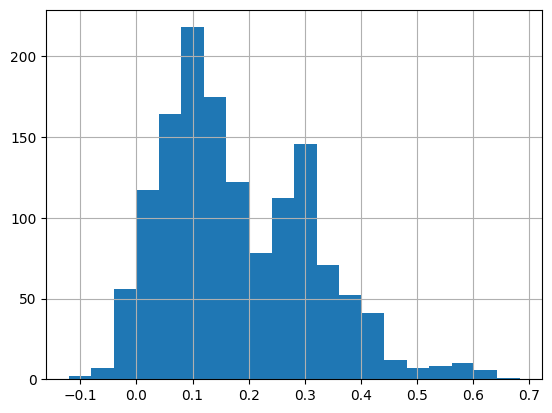

In [12]:
df['Age'].hist(bins = 20)

In [21]:
df['Age'].mean()

0.19504889984253887

In [13]:
df[df['Age'] > 0.4]['Variable Label'].to_list()

['Median age of total population',
 'Median age of female population',
 'Median age of male population',
 'Median income of female population (dollars, ages 15 and over with income in the past 12 months, inflation-adjusted to data file year)',
 'Median income of male population (dollars, ages 15 and over with income in the past 12 months, inflation-adjusted to data file year)',
 'Percentage of population between ages 0-17',
 'Percentage of population between ages 0-4',
 'Percentage of population between ages 10-14',
 'Percentage of population between ages 15-17',
 'Percentage of population between ages 18-29',
 'Percentage of population between ages 18-44',
 'Percentage of population between ages 30-44',
 'Percentage of population between ages 45-64',
 'Percentage of population between ages 50-64',
 'Percentage of population between ages 5-9',
 'Percentage of population ages 65 and over',
 'Percentage of population ages 80 and over',
 "Percentage of population with a bachelor's degree 

In [ ]:
# finding similarity scores for each word in the variable label against 8 words and storing them in that cell

# iterating through each row of the dataframe
for index, row in df.iterrows():
    # getting the variable label
    var_label = row['Variable Label']
    sentences = [var_label, 'address']
    embedding = model.encode(sentences, convert_to_tensor=False)
    cosine_scores = util.cos_sim(embedding, embedding)

    d = {}
    for i, v1 in enumerate(sentences):
        for j, v2 in enumerate(sentences):
            if i >= j:
                continue
            d[v1 + ' vs. ' + v2] = cosine_scores[i][j].item()

    # sort by score
    d_sorted = dict(sorted(d.items(), key=lambda x: x[1], reverse=True))
    
    # storing it in the cell
    df.at[index, 'Age'] = d_sorted[var_label + ' vs. age']

In [35]:
# plotting tsne on embeddings for all the variable labels with age cell value > 0.4
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# getting the embeddings for all the variable labels
sentences = df[df['Age'] > 0.4]['Variable Label'].to_list()
embedding = model.encode(sentences, convert_to_tensor=False)
# sentences.append('age')
# tsne not printing the sentences just a dot
tsne = TSNE(n_components=2)
Y = tsne.fit_transform(embedding)


# # plotting
# plt.scatter(Y[:, 0], Y[:, 1])
# for label, x, y in zip(sentences, Y[:, 0], Y[:, 1]):
#     plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
# plt.show()

# import plotly.express as px

# fig=px.scatter_3d(x=Y[:, 0], y=Y[:, 1], z=Y[:, 1], color='y', opacity=0.8)
# fig.show()

In [61]:
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px

# Assuming 'embedding' is a 2D array of size (number_of_embeddings, 384)
# You may need to reshape your embeddings if it's not in this format

# Assuming df is your DataFrame containing the variable labels and ages
sentences = df[df['Age'] > 0.4]['Variable Label'].to_list()

# Assuming 'model' is your embedding model, replace it with the actual model you are using
embedding = model.encode(sentences, convert_to_tensor=False)

# converting "age" to embeddings and adding it to the list
age_embedding = model.encode(['age'], convert_to_tensor=False)
print(age_embedding)

# Perform t-SNE
tsne = TSNE(n_components=2)
Y = tsne.fit_transform(embedding)

# Create a DataFrame for Plotly
tsne_df = pd.DataFrame(data=Y, columns=['TSNE1', 'TSNE2'])
print(tsne_df.head(10))
tsne_df['Variable Label'] = sentences

# Create the scatter plot using Plotly Express
fig = px.scatter(tsne_df, x='TSNE1', y='TSNE2', title='t-SNE Visualization of Embeddings')

# Add the "age" embedding to the plot which is a single

     
# Show the plot
fig.show()

      TSNE1     TSNE2
0  3.749070  2.490451
1  4.073554  2.405147
2  3.948820  2.854011
3  0.706086  0.965515
4  1.112968  0.387909
5  0.777546  0.770146
6  0.439503  1.098235
7  1.396493  0.888758
8  1.701406  0.698797
9  1.903257  0.607982


In [20]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px

# Assuming 'embedding' is a 2D array of size (number_of_embeddings, 384)
# You may need to reshape your embeddings if it's not in this format

# Assuming df is your DataFrame containing the variable labels and ages
sentences = df[df['Age'] > 0.4]['Variable Label'].to_list()

# Assuming 'model' is your embedding model, replace it with the actual model you are using
embedding = model.encode(sentences, convert_to_tensor=False)

# Converting "age" to embeddings and adding it to the list
age_embedding = model.encode(['age'], convert_to_tensor=False)
embedding = np.vstack((age_embedding, embedding))
print(embedding.shape,"embedding shape")  
# Perform t-SNE
tsne = TSNE(n_components=3)
# print(embedding.shape,"embedding shape")
Y = tsne.fit_transform(embedding)

# Create a DataFrame for Plotly
tsne_df = pd.DataFrame(data=Y, columns=['TSNE1', 'TSNE2', 'TSNE3'])
# adding age embedding to the dataframe at top
# print(age_embedding.shape,"age embedding shape")
# print(age_embedding,"age embedding")




# tsne_df['Variable Label'] = sentences
print(tsne_df.head(10))
# Create the scatter plot using Plotly Express
fig = px.scatter_3d(tsne_df, x='TSNE1', y='TSNE2', z='TSNE3', title='t-SNE Visualization of Embeddings')
fig.add_scatter3d(x = [0], y= [0], z=[0], mode='markers',marker=dict(color='red'),showlegend=False)
fig.show()


(88, 384) embedding shape
       TSNE1       TSNE2       TSNE3
0  75.455231   55.135921   86.895348
1  56.555199   92.919708   46.863457
2  29.748562  108.190491   63.874825
3 -39.707344   40.105583  125.718315
4 -54.116615  -13.818153  -13.465826
5 -50.956108   -2.829229  -41.436153
6  27.223808   41.506786   60.670856
7 -70.611214   38.147648   17.092583
8 -51.942459   54.854698  -16.847879
9  45.497761   90.627151   -4.851148


In [21]:
# saving dataframe to csv
df.to_csv('E:/gc_data/dataset/new.csv', index=False)

In [36]:
embedding.shape

(68, 384)